<a href="https://colab.research.google.com/github/avigangarde/cap-3-Health-Insurance-Cross-Sell-Prediction./blob/main/Cap_3_Copy_of_Health_insurance_Classification_by_avinash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEALTH-INSURANCE-CROSS-SELL-PREDICTION**

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **Project outline: **
1. Importing Libraries
2. Import Data
3. Data Summary
4. Exploratory Data Analysis and Visualization
5. Data Cleaning 
6. Feature Selection
7. Model Selection
8. Hyperparameter Tuning
9. Conclusion

**Importing Libraries**

In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

#used to split dataset
from sklearn.model_selection import train_test_split

#used to resampling(when our dependent variable is imbalanced)
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


#Ml algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


#used in feature selection
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

sns.set_theme(style="darkgrid")

# **Import Data**

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML capstone csv /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# take a look at tail
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


# **Data Summary**
 #### Dataset shape
#### A new DataFrame where we have columns name of this df along with datatype , missing value no , unique values no , first value , second value

In [6]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [7]:
DataInfoAll(df)

Dataset Shape: (381109, 12)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,id,int64,0,381109,1,2
1,Gender,object,0,2,Male,Male
2,Age,int64,0,66,44,76
3,Driving_License,int64,0,2,1,1
4,Region_Code,float64,0,53,28.0,3.0
5,Previously_Insured,int64,0,2,0,0
6,Vehicle_Age,object,0,3,> 2 Years,1-2 Year
7,Vehicle_Damage,object,0,2,Yes,No
8,Annual_Premium,float64,0,48838,40454.0,33536.0
9,Policy_Sales_Channel,float64,0,155,26.0,26.0


* There is no Null value present in this dataset

* All the numerical values are present in integer or float datatype 

# **Exploratory Data Analysis and Visualization**
**Checking outliers in all the numerical columns**

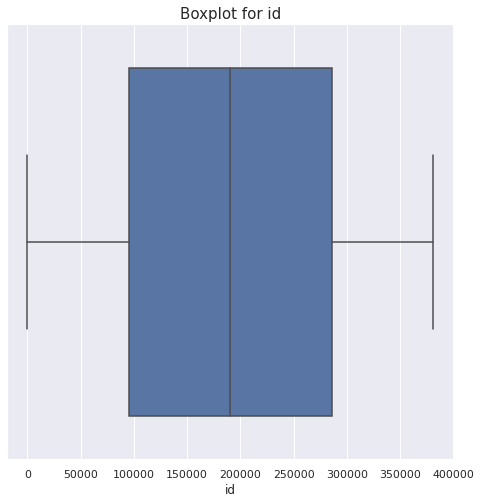

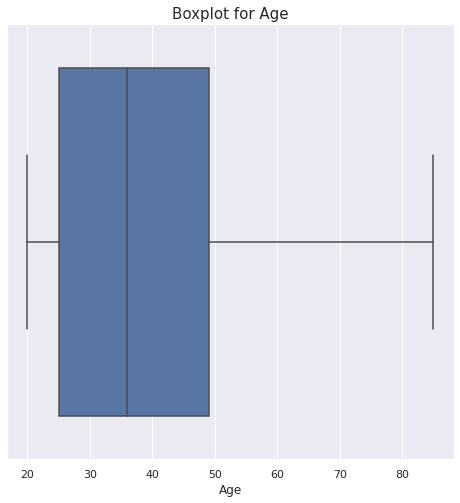

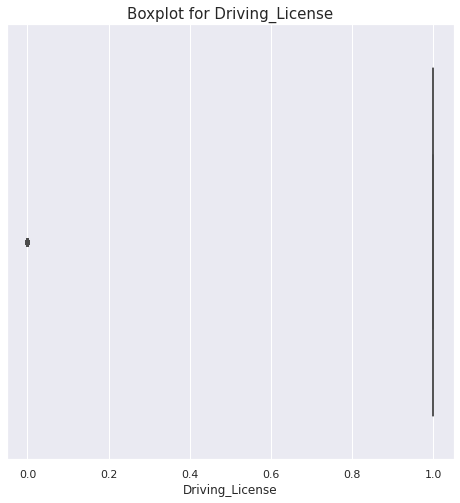

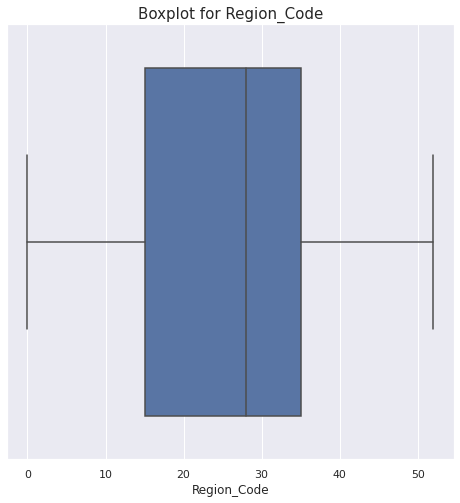

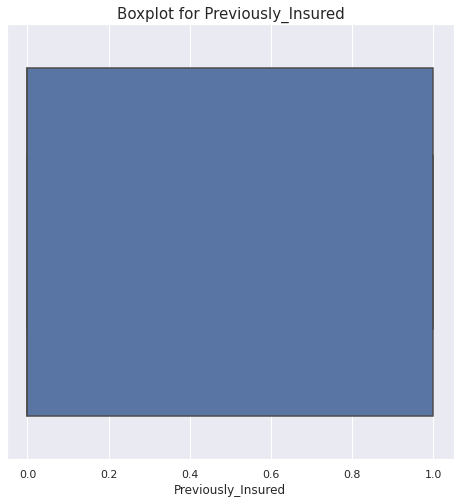

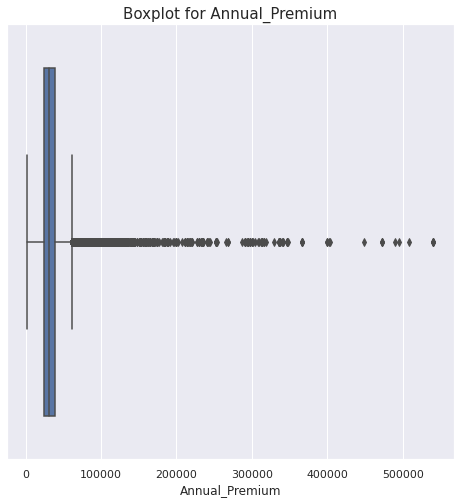

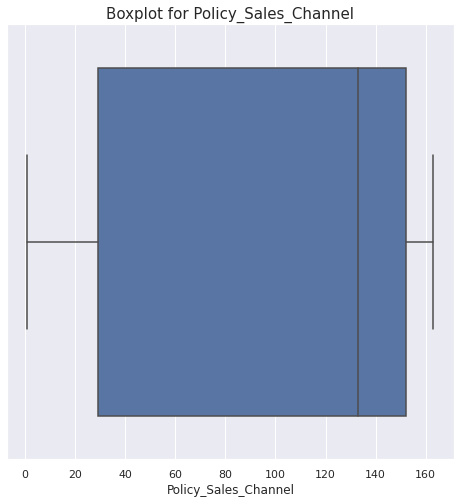

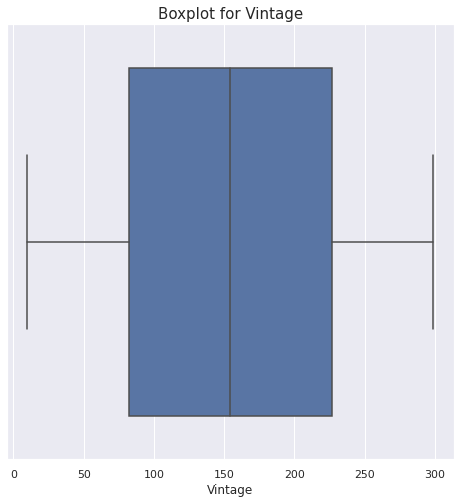

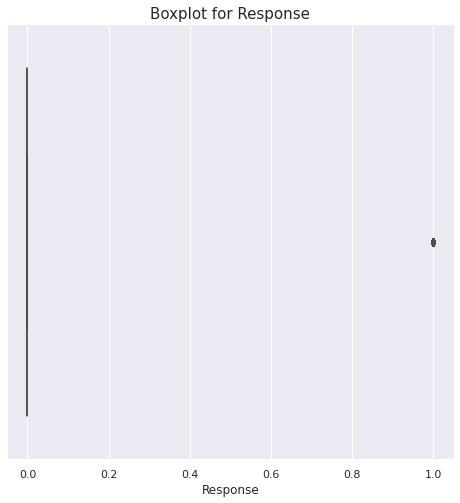

In [8]:
import matplotlib.pyplot as plt
df1 = df[list(df.describe())]

for column in df1:
        plt.figure(figsize=( 8 , 8))
        plt.title(f'Boxplot for {column}' , fontsize = 15)
        sns.boxplot(data=df1, x=column)



 **Target Variable**

The data is highly imbalanced.
As you can see in above graph, there are very few interested customers whose stats are less than 50000 and those above 300000 are not interested

Let's check outlier present in all numerical columns


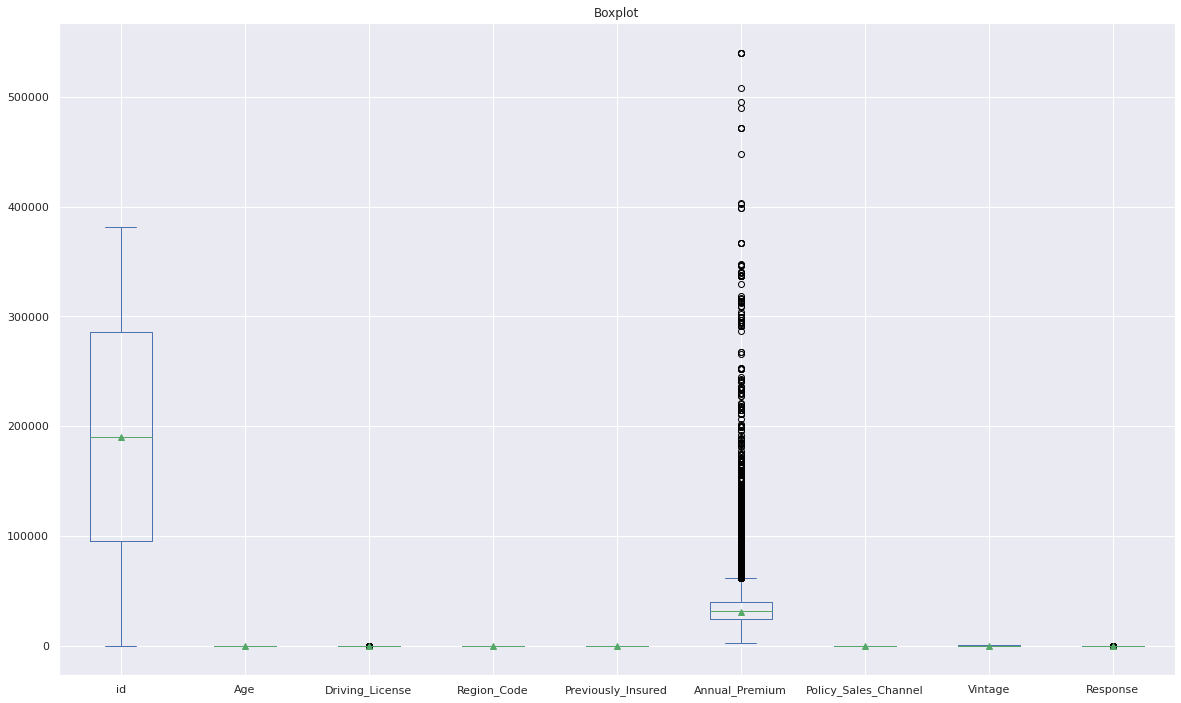

In [9]:
plt.rcParams['figure.figsize']=(20,12)
ax = df[list(df.describe())].plot(kind='box', title='Boxplot', showmeans=True)

plt.show()

As you can see
1.  Annual_Premium has the highest outliers present in this dataset
2.  Driving_License has very less outliers.
3. Response has very less outliers.

# **Gender**

In [10]:
df.Gender.value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

* The gender variable ratio in the dataset is almost equal, male category is slightly more than female and also the chances of buying insurance is also little high than female.

* The number of male is greater than 200000 and The number of female is close to 175000. The number of male is intersted which is greater than 25000 and The number of female is intersted which is below 25000.Male category is slightly greater than that of female and chances of buying the insurance is also little high



# **Age vs Response**

In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

<Axes: xlabel='Age', ylabel='count'>

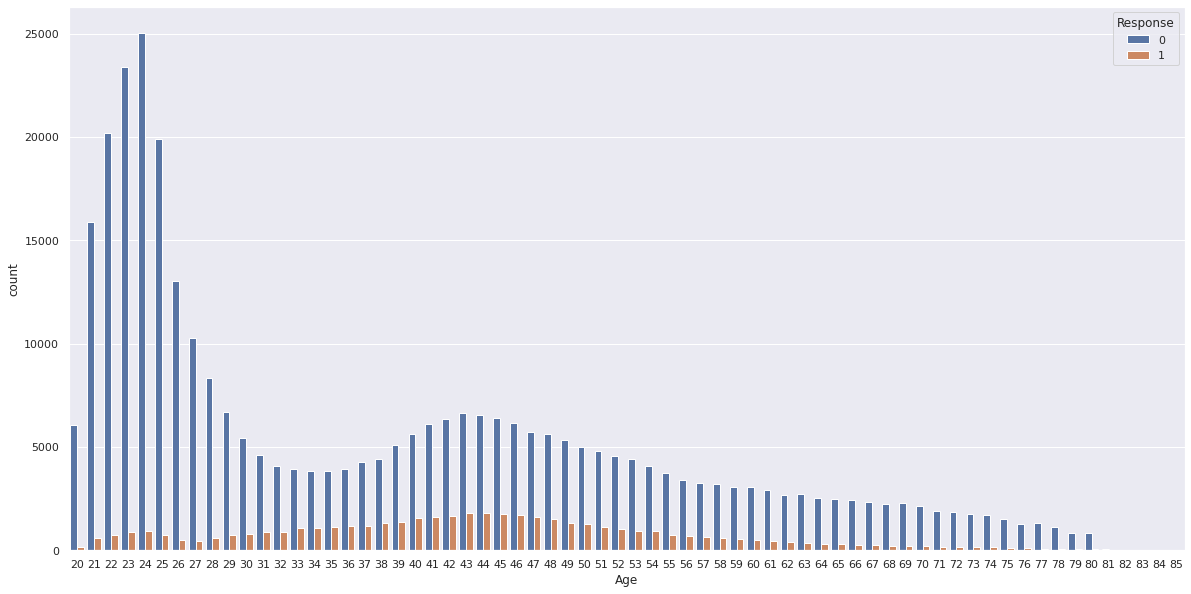

In [12]:
#### Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)

# **Outlier present or not**

<Axes: >

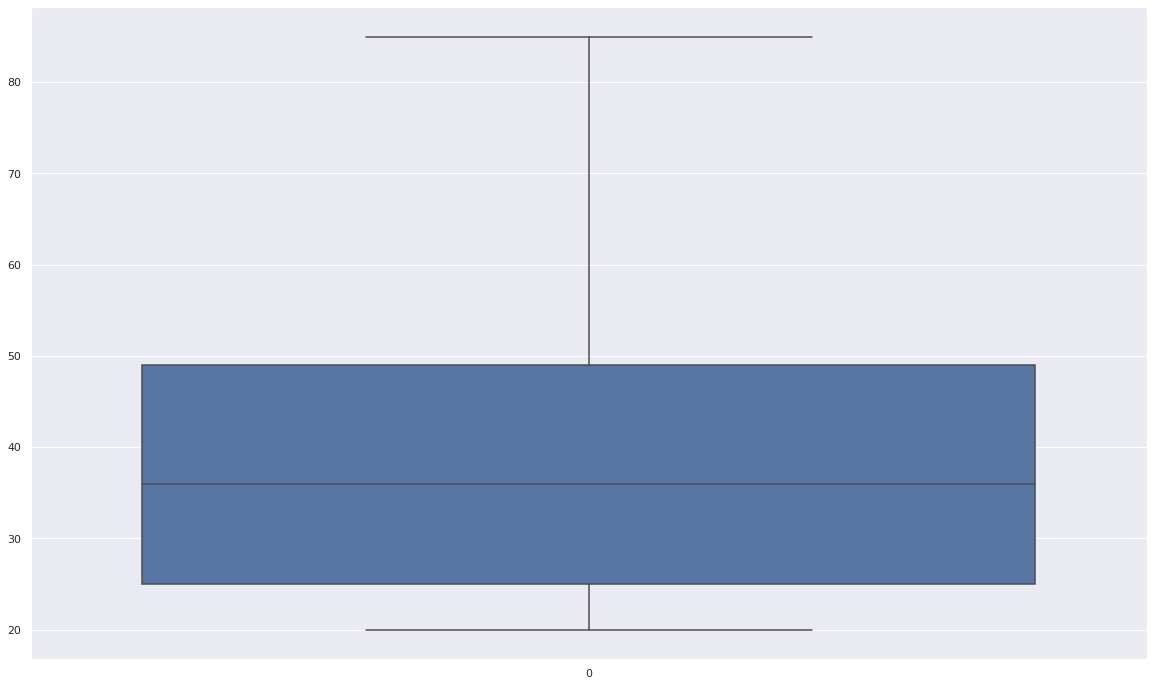

In [13]:
sns.boxplot(df['Age'])

* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
* People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the data
As you can see there is no outliers present in Age

In [14]:
df.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

* Customers who are interested in Vehicle Insurance almost all have driving license

# **Previously_Insured Vs Response**

<Axes: xlabel='Previously_Insured', ylabel='count'>

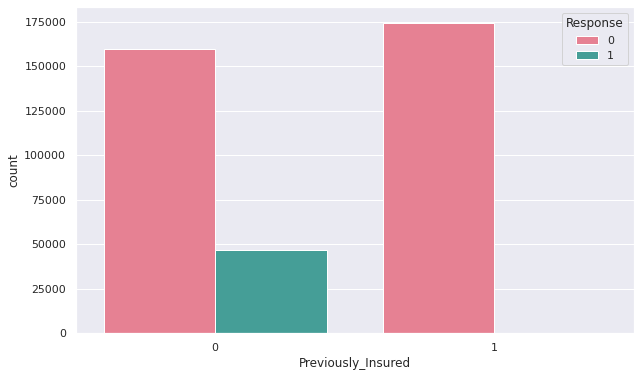

In [15]:
plt.figure( figsize = (10 , 6))
sns.countplot(x = 'Previously_Insured' , hue = 'Response' , data = df , palette = 'husl' )

* Those who have not insurance some of them are taking insurance

# **Vehicle_Age Vs Response**

In [16]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

(-0.5, 2.5, 10.0, 175000.0)

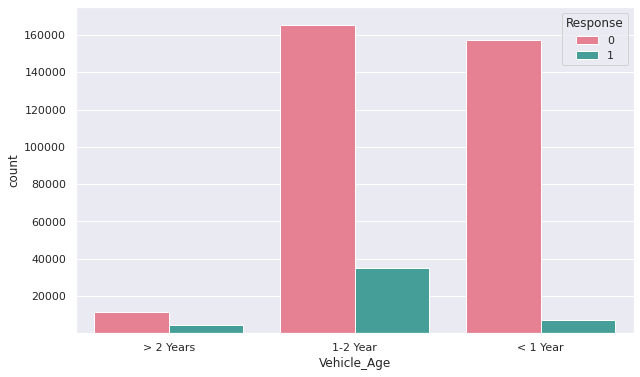

In [17]:
plt.figure( figsize = (10 , 6))
sns.countplot(x = 'Vehicle_Age' , hue = 'Response' , data = df , palette = 'husl')
plt.axis([None,None,10,175000])

* From seeing this graph we can say that if the vehicle's age is in between 1 to 2 years ,those vehicle owners are more likely to buy insurance

* No of customers with Vehicle_Age >2 is more than the no of customers whose Vehicle_Age< 1

# **Annual_Premium**

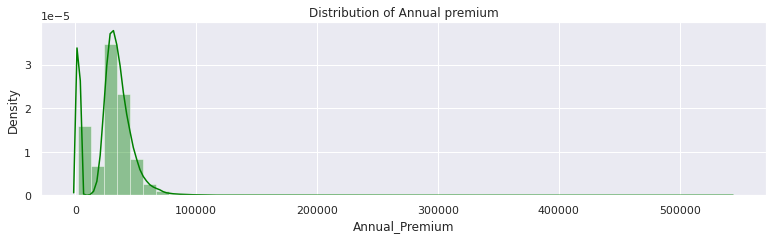

In [18]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

* From the distribution plot we can infer that the annual premimum variable is right skewed.


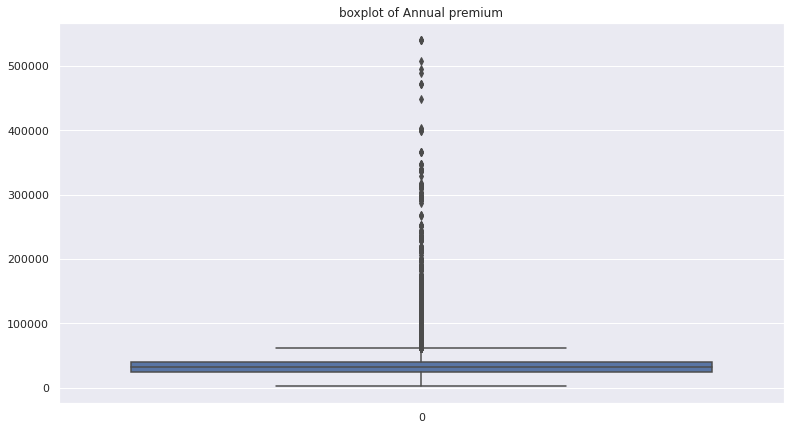

In [19]:
plt.figure(figsize=(13,7))
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

# Outlier Treatment with IQR range

In [20]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [21]:
# Driver code
sample_outliers = detect_outliers_iqr(df['Annual_Premium'])


In [22]:
median = np.median(df['Annual_Premium'])
print(median)

31669.0


In [23]:
for i in sample_outliers:
  df['Annual_Premium'].replace(i,median,inplace=True)

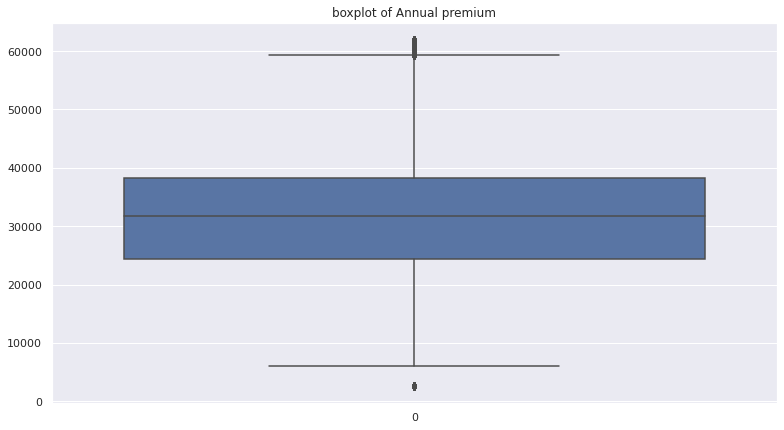

In [24]:
plt.figure(figsize=(13,7))
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

As you can see that in the column Annual_premium there are many outliers present

# **Correlation Matrix**

Text(0.5, 1.05, 'Pearson correlation of Features')

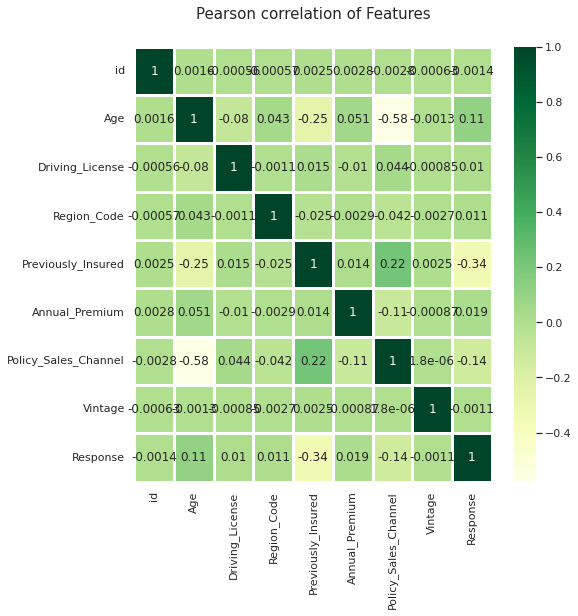

In [25]:
corr = df.corr()

f, ax = plt.subplots(figsize = (8 , 8 ))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", fontsize=25 ,y=1.05, size=15)


**Target variable ( Response )** is not much affected by Vintage variable. we can drop least correlated variable.

# **Data Cleaning**

**Removing duplicate rows**


In [26]:
df_old_row = df.shape[0]
df.drop_duplicates(inplace = True)
df_new_row = df.shape[0]
if df_old_row == df_new_row:
    print("There was no duplicate rows present")
else:
    print(f"There was {df_old_row - df_new_row} duplicate rows present")

There was no duplicate rows present


In [27]:
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0


In [28]:
categorical_cols = list(set(df.columns) - set(numerical_cols))
categorical_df = df[categorical_cols]
categorical_df.head()

,Vehicle_Damage,Vehicle_Age,Gender
0,Yes,> 2 Years,Male
1,No,1-2 Year,Male
2,Yes,> 2 Years,Male
3,No,< 1 Year,Male
4,No,< 1 Year,Female


Let's convert the categorical columns into numeric using LabelEncoder,
But before that let's check in each column of categorical_df how namy unique values are present

In [29]:
for column_name in categorical_df.columns:
    print('-'*35)
    print(categorical_df[column_name].value_counts(),'\n')
    print('-'*35)

-----------------------------------
Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 

-----------------------------------
-----------------------------------
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 

-----------------------------------
-----------------------------------
Male      206089
Female    175020
Name: Gender, dtype: int64 

-----------------------------------


# **Using LabelEncoder**

In [30]:
categorical_df.head(3)

,Vehicle_Damage,Vehicle_Age,Gender
0,Yes,> 2 Years,Male
1,No,1-2 Year,Male
2,Yes,> 2 Years,Male


In [31]:
le = LabelEncoder()
categorical_df = categorical_df.apply(le.fit_transform)
categorical_df.head(3)

,Vehicle_Damage,Vehicle_Age,Gender
0,1,2,1
1,0,0,1
2,1,2,1


In [32]:
## Let's check the classes of label encoder
le.classes_

array(['Female', 'Male'], dtype=object)

In [33]:
##Let's use inverse_transform
le.inverse_transform([1])

array(['Male'], dtype=object)

In [34]:
categorical_df_new = categorical_df
categorical_df_new.head()

,Vehicle_Damage,Vehicle_Age,Gender
0,1,2,1
1,0,0,1
2,1,2,1
3,0,1,1
4,0,1,0


Let's make **new df** by merging numerical_df DataFrame with **categorical_df_new**

In [35]:
df = pd.merge( numerical_df , categorical_df_new , left_index = True , right_index = True )

In [36]:
df.head(1).T

,0
id,1.0
Age,44.0
Driving_License,1.0
Region_Code,28.0
Previously_Insured,0.0
Annual_Premium,40454.0
Policy_Sales_Channel,26.0
Vintage,217.0
Response,1.0
Vehicle_Damage,1.0


In [37]:
df = df.drop( axis=1 , columns = ['id'])
df.head(2)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage,Vehicle_Age,Gender
0,44,1,28.0,0,40454.0,26.0,217,1,1,2,1
1,76,1,3.0,0,33536.0,26.0,183,0,0,0,1


In [38]:
DataInfoAll(df)

Dataset Shape: (381109, 11)
---------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,Age,int64,0,66,44.0,76.0
1,Driving_License,int64,0,2,1.0,1.0
2,Region_Code,float64,0,53,28.0,3.0
3,Previously_Insured,int64,0,2,0.0,0.0
4,Annual_Premium,float64,0,41667,40454.0,33536.0
5,Policy_Sales_Channel,float64,0,155,26.0,26.0
6,Vintage,int64,0,290,217.0,183.0
7,Response,int64,0,2,1.0,0.0
8,Vehicle_Damage,int64,0,2,1.0,0.0
9,Vehicle_Age,int64,0,3,2.0,0.0


# **Seprating dependent and independent variables**

In [39]:
x = df.drop(columns = ['Response'])
y = df.Response

# **Feature Selection**

Text(0.5, 1.0, 'Comparison of different Feature Importances')

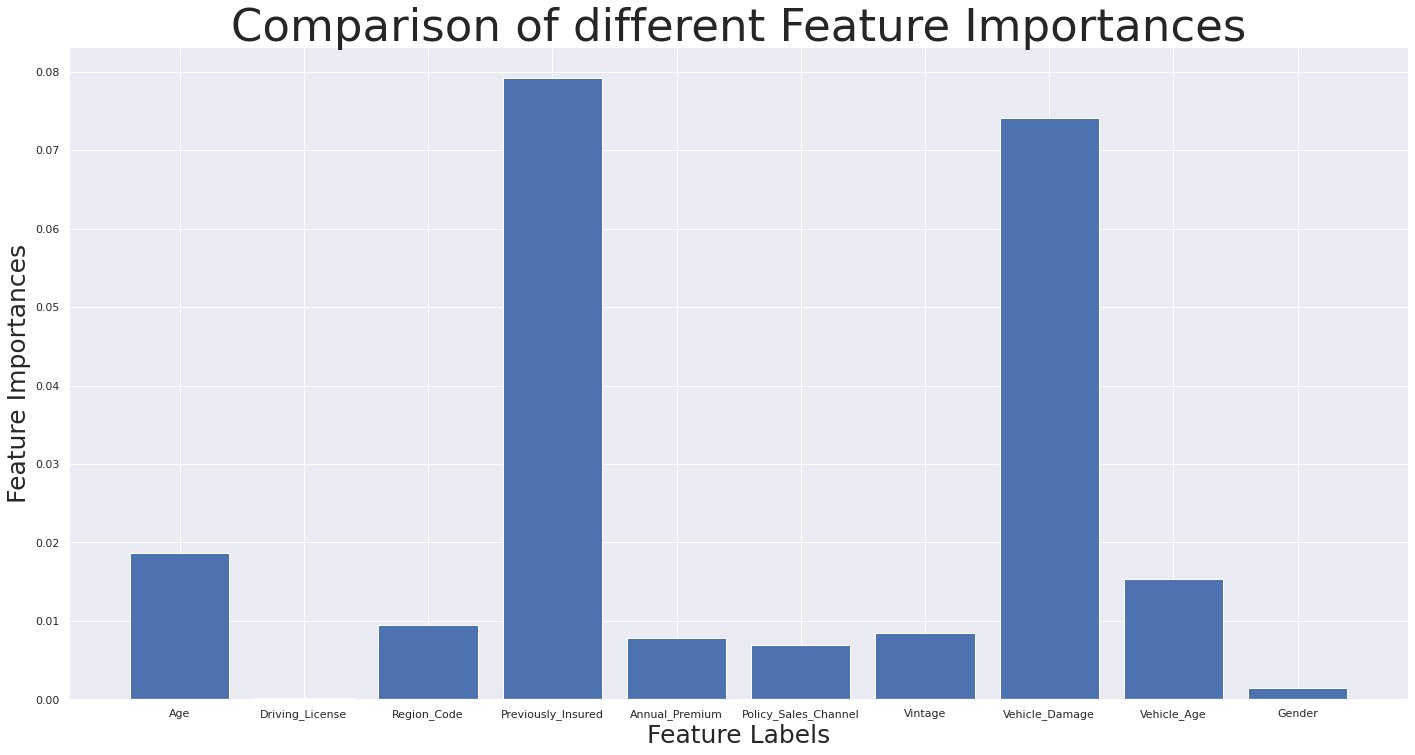

In [40]:
# Building the model
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)


# Plotting a Bar Graph to compare the models
plt.figure(figsize = (24,12))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 25)
plt.ylabel('Feature Importances' , fontsize = 25)
plt.title('Comparison of different Feature Importances' , fontsize = 45)

In [41]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

Feature Name		 Importance
-------------------------------------


Driving_License         0.000131
Gender                  0.001446
Policy_Sales_Channel    0.006979
Annual_Premium          0.007853
Vintage                 0.008456
Region_Code             0.009485
Vehicle_Age             0.015307
Age                     0.018646
Vehicle_Damage          0.074045
Previously_Insured      0.079175
dtype: float64

1. We can remove less important features from the data set
2. Driving_License , Gender is contributing very less that's why I'm removing those columns

In [42]:
x.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Vehicle_Damage',
       'Vehicle_Age', 'Gender'],
      dtype='object')

****

In [43]:
x.drop( labels = [ 'Driving_License' ] , axis = 1 , inplace = True)

In [44]:
x.head(1).T

,0
Age,44.0
Region_Code,28.0
Previously_Insured,0.0
Annual_Premium,40454.0
Policy_Sales_Channel,26.0
Vintage,217.0
Vehicle_Damage,1.0
Vehicle_Age,2.0
Gender,1.0


# **Handling Imbalanced data**
When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique

# **Using RandomOverSampler to resample the dataset**

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


<Axes: ylabel='count'>

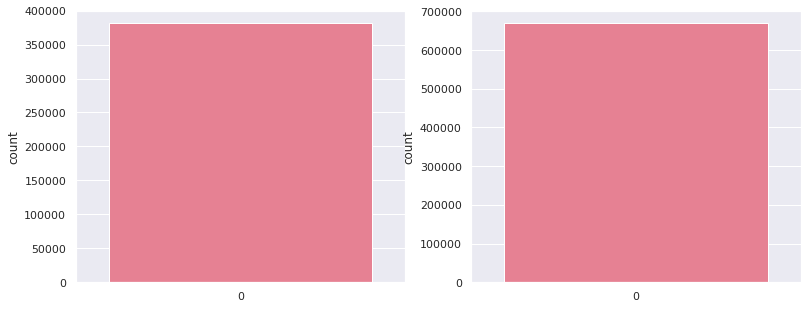

In [45]:
from imblearn.over_sampling import SMOTE
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(y,palette='husl')

smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
x_new, y_new = smt.fit_resample(x, y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
plt.subplot(1,2,2)
sns.countplot(y_new,palette='husl')

As you can see now our response is having same no of both classes

* Splitting Dataset into 80:20 ratio

In [46]:
#dividing the dataset into training and testing
xtrain , xtest , ytrain , ytest = train_test_split( x_new , y_new , test_size = 0.2 , random_state = 1 )
print(f"xtrain.shape\txtest.shape\tytrain.shape\tytest.shape")
print('-'*60)
print(f'{xtrain.shape}\t{xtest.shape}\t {ytrain.shape}\t {ytest.shape}')

xtrain.shape	xtest.shape	ytrain.shape	ytest.shape
------------------------------------------------------------
(535038, 9)	(133760, 9)	 (535038,)	 (133760,)


# **Feature Scaling**

In [47]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# **Model Selection**
Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)
Dataset has more than 300k records
cannot go with SVM Classifier as it takes more time to train as dataset increase
Idea is to start selection of models as:

**1. Logistic Regression**

**2. Random Forest**

**3. XGBClassifier**


# **1.Logistic Regression**

In [48]:
model=LogisticRegression()

model=model.fit(xtrain,ytrain)

pred=model.predict(xtest)

lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(ytest,pred) , 3))
print("Precision:" , round(precision_score(ytest,pred) , 3))
print("Recall:" , round(recall_score(ytest,pred), 3))
print("F1-Score:" , round(f1_score(ytest,pred) , 3))
print("ROC_AUC Score:" , round(AUC_LR , 3))

Accuracy :  0.786
Precision: 0.729
Recall: 0.911
F1-Score: 0.81
ROC_AUC Score: 0.805


In [49]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.66      0.88      0.76     50123
           1       0.91      0.73      0.81     83637

    accuracy                           0.79    133760
   macro avg       0.79      0.81      0.78    133760
weighted avg       0.82      0.79      0.79    133760



**ROC curve for logistic reg.**

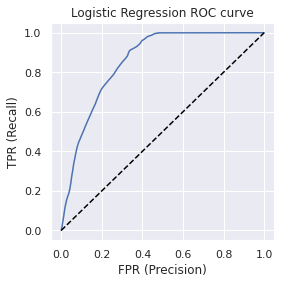

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)
plt.figure( figsize = (4 ,4))
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')


plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix for Logistic Reg.**

[[44189 22658]
 [ 5934 60979]]


<Axes: >

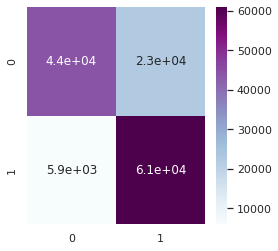

In [51]:
cm=confusion_matrix(ytest,pred)
print(cm)
plt.figure( figsize = (4 ,4))
sns.heatmap(cm,annot=True,cmap='BuPu')

# **2.RandomForest Classifier**

In [52]:
randomforest = RandomForestClassifier()

randomforest=randomforest.fit(xtrain, ytrain)

y_pred = randomforest.predict(xtest)

RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(ytest , y_pred) , 3))
print("Precision:" , round(precision_score(ytest,y_pred) , 3))
print("Recall:" , round(recall_score(ytest , y_pred), 3))
print("F1-Score:" , round(f1_score(ytest , y_pred) , 3))
print("ROC_AUC Score:" , round(AUC_LR , 3))

Accuracy :  0.889
Precision: 0.876
Recall: 0.908
F1-Score: 0.891
ROC_AUC Score: 0.805


In [53]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     64384
           1       0.91      0.88      0.89     69376

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760



**ROC curve for RandomForest**

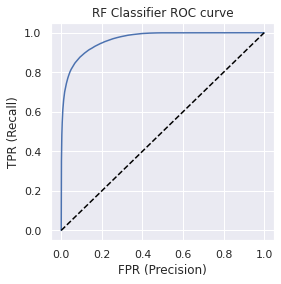

In [54]:
fpr, tpr, _ = roc_curve(ytest, RF_probability)
plt.figure( figsize = (4 , 4))
plt.title('RF Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix for Random Forest**

[[58221  6163]
 [ 8626 60750]]


<Axes: >

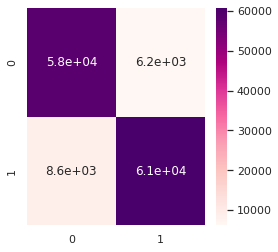

In [55]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
plt.figure( figsize = (4 , 4))
sns.heatmap(cm,annot=True,cmap='RdPu')

# **3. XGBClassifier**

In [56]:
xgb=XGBClassifier()

XGB_fit=xgb.fit(xtrain, ytrain)

y_predict = XGB_fit.predict(xtest)

XGB_probability = XGB_fit.predict_proba(xtest)[:,1]



acc_xgb = accuracy_score( ytest , y_predict)
recall_xgb = recall_score( ytest , y_predict)
precision_xgb = precision_score( ytest , y_predict)
f1score_xgb = f1_score( ytest , y_predict)

AUC_xgb = roc_auc_score( y_predict , ytest)


#print accuracy and Auc values of model
print("Accuracy : ", round(acc_xgb , 3))
print("Precision:" , round(precision_xgb , 3))
print("Recall:" , round( recall_xgb , 3))
print("F1-Score:" , round( f1score_xgb , 3))
print("ROC_AUC Score:" , round(AUC_xgb , 3))

Accuracy :  0.894
Precision: 0.896
Recall: 0.89
F1-Score: 0.893
ROC_AUC Score: 0.894


In [57]:
print(classification_report( y_predict , ytest ))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     67281
           1       0.89      0.90      0.89     66479

    accuracy                           0.89    133760
   macro avg       0.89      0.89      0.89    133760
weighted avg       0.89      0.89      0.89    133760



**ROC curve for XGBoost**

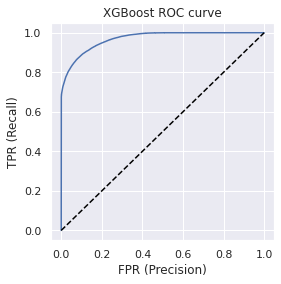

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)
plt.figure( figsize = (4 ,4))

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Confusion Matrix for XGBoost**

[[59949  6898]
 [ 7332 59581]]


<Axes: >

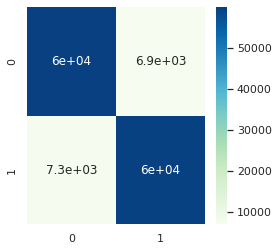

In [59]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
plt.figure( figsize = ( 4 , 4 ))
sns.heatmap(cm,annot=True,cmap='GnBu')

# **Let's compare the models**

In [60]:
ind=['Logistic regression','RandomForest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.786244,0.911318,0.729091,0.810083,0.805351
RandomForest,0.889436,0.907895,0.875663,0.891488,0.889970
XGBClassifier,0.893615,0.890425,0.896238,0.893322,0.893631


# **Hyperparameter Tuning**
XGBClassifier is giving highest accuracy , that's why by using GridSearchCV I will set Hyperparameters value

In [61]:
from sklearn.model_selection import cross_val_score , ShuffleSplit , GridSearchCV

In [62]:
Model = XGBClassifier(gamma=0,subsample=0.8,colsample_bytree=0.8 , reg_alpha=0.005)

In [63]:
params = {
    'learning_rate': [0.05,0.1, 0.15],
              'max_depth': [5,6,7,8],
              'n_estimators': [25,40,50]
              
        }
gridsearch = GridSearchCV(Model , params , cv=5, return_train_score=True,refit='recall_score')
gridsearch.fit(xtrain , ytrain )

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [25, 40, 50]},
             refit='recall_score', return_train_score=True)

In [64]:
print(gridsearch.best_params_)

{'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 50}


Now we got the best values of our hyperparameters,

#### Let's build the FinalModel

In [65]:
gridsearch_predictions = gridsearch.predict( xtest ) 
  
# print classification report 
print(classification_report(ytest, gridsearch_predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     66847
           1       0.85      0.92      0.88     66913

    accuracy                           0.87    133760
   macro avg       0.88      0.87      0.87    133760
weighted avg       0.88      0.87      0.87    133760



In [66]:
Grid_predict_proba = gridsearch.predict_proba(xtest)[:,1]

AUC_XG_Best = roc_auc_score(gridsearch_predictions ,ytest)
acc_XG_Best = accuracy_score(gridsearch_predictions ,y_pred)
recall_XG_Best = recall_score(gridsearch_predictions ,y_pred)
precision_XG_Best = precision_score(ytest,gridsearch_predictions )
f1score_XG_Best = f1_score(ytest,gridsearch_predictions )

#print accuracy and Auc values of model
print("Accuracy : ", round(accuracy_score(ytest,gridsearch_predictions) , 3))
print("Precision:" , round(precision_score(ytest,gridsearch_predictions) , 3))
print("Recall:" , round(recall_score(ytest, gridsearch_predictions ), 3))
print("F1-Score:" , round(f1_score(ytest, gridsearch_predictions ) , 3))
print("ROC_AUC Score:" , round(AUC_LR , 3))

Accuracy :  0.874
Precision: 0.846
Recall: 0.915
F1-Score: 0.879
ROC_AUC Score: 0.805


In [67]:
print(classification_report(y_pred , gridsearch_predictions ))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     64384
           1       0.90      0.94      0.92     69376

    accuracy                           0.91    133760
   macro avg       0.91      0.91      0.91    133760
weighted avg       0.91      0.91      0.91    133760



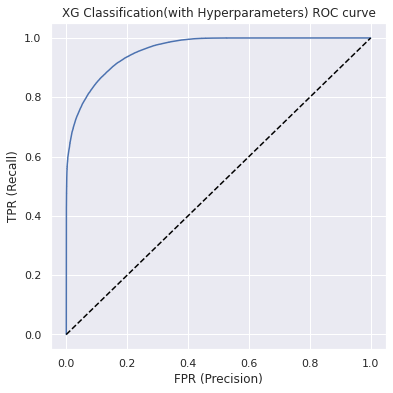

In [68]:
fpr, tpr, _ = roc_curve(ytest, Grid_predict_proba)

plt.figure( figsize = ( 6 , 6 ))
plt.title('XG Classification(with Hyperparameters) ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[58221  6163]
 [ 8626 60750]]


<Axes: >

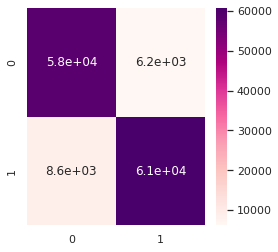

In [69]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
plt.figure( figsize = ( 4 , 4 ))
sns.heatmap(cm,annot=True,cmap='RdPu')

# **Final Result**

In [70]:
ind=['XGBClassifier','XGBClassifier(Using Hyper.)']
data={"Accuracy":[acc_xgb , acc_XG_Best],"Recall":[ recall_xgb , recall_XG_Best],"Precision":[ precision_xgb , precision_XG_Best],
    'f1_score':[ f1score_xgb , f1score_XG_Best],"ROC_AUC":[ AUC_xgb , AUC_XG_Best]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
XGBClassifier,0.893615,0.890425,0.896238,0.893322,0.893631
XGBClassifier(Using Hyper.),0.912971,0.898717,0.845914,0.879237,0.876770


* As you can see after using Hyperparameters Accuracy , Precision , f1_score , ROC_AUC Increased(tiny change) , Recall decresed
* But the change is very low , If u wish then you can ignore it also.

# **Conclusion**
The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by XGBClassifier is preferred.
1. Customers of age between 30 to 60 are more likely to buy insurance.
2. Customers with Driving License have higher chance of buying Insurance.
3. Customers with Vehicle_Damage are likely to buy insurance.
4. The variable such as Previously_insured , Vehcile_Damage are more affecting the target variable.
5. The variable such as Driving_License , Gender are not affecting the target variable.

